Loaded grid_1: 172 neurons
Position data available: 238700 time points
neuron 69
score: 0.8761650577011183
spacing: [18.43908891 17.08800749 18.11077028]
orientation: [-40.60129465  20.55604522  83.65980825]


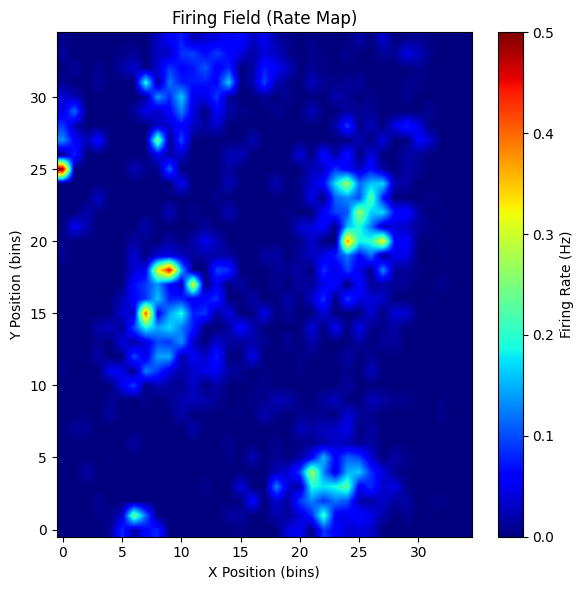

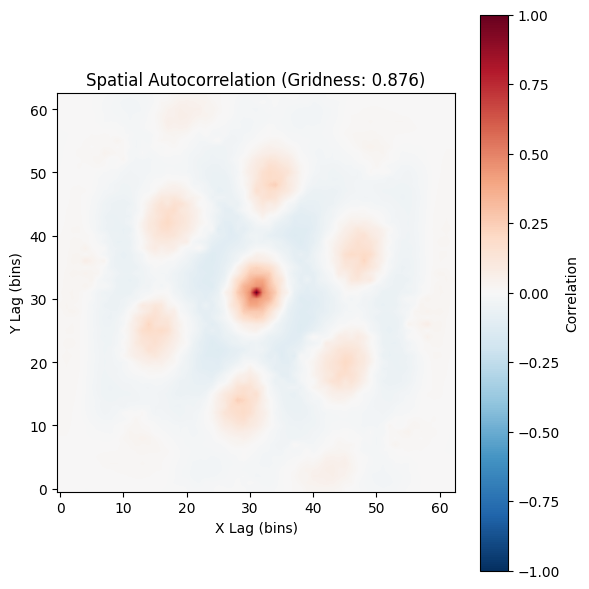

(<Figure size 600x600 with 2 Axes>,
 <Axes: title={'center': 'Spatial Autocorrelation (Gridness: 0.876)'}, xlabel='X Lag (bins)', ylabel='Y Lag (bins)'>)

In [ ]:
from canns.analyzer import data
from canns.analyzer.data.cell_classification import (
    GridnessAnalyzer,
    compute_2d_autocorrelation,
    compute_rate_map_from_binned,
    plot_autocorrelogram,
    plot_rate_map,
)
from canns.data.loaders import load_grid_data, load_left_right_npz

grid_data = load_grid_data()
cfg = data.SpikeEmbeddingConfig(smooth=False, speed_filter=True, min_speed=0.0)
spikes, xx, yy, _tt = data.embed_spike_trains(grid_data, config=cfg)

analyzer = GridnessAnalyzer()

neuron_id = 69
rate_map, *_ = compute_rate_map_from_binned(xx, yy, spikes[:, neuron_id], bins=35)
autocorr = compute_2d_autocorrelation(rate_map)
result = analyzer.compute_gridness_score(autocorr)
print(f"neuron {neuron_id}\nscore: {result.score}\nspacing: {result.spacing}\norientation: {result.orientation}")

# Visualize rate map + autocorrelogram
plot_rate_map(rate_map, show=True)
plot_autocorrelogram(autocorr, gridness_score=result.score, show=True)


In [8]:
from canns.analyzer.data.cell_classification import (
    GridnessAnalyzer,
    identify_grid_modules_and_stats,
    compute_rate_map_from_binned,
    compute_2d_autocorrelation,
)
import numpy as np

grid_data = load_left_right_npz(
    session_id="28304_1",
    filename="28304_1_ASA_mec_full_cm.npz",
)
n_units = spikes.shape[1]
autocorrs = []
for nid in range(n_units):
    rate_map, *_ = compute_rate_map_from_binned(xx, yy, spikes[:, nid], bins=35)
    autocorr = compute_2d_autocorrelation(rate_map)
    autocorrs.append(autocorr.astype(np.float32, copy=False))

autocorrs = np.stack(autocorrs, axis=0)

analyzer = GridnessAnalyzer()
out = identify_grid_modules_and_stats(
    autocorrs,
    gridness_analyzer=analyzer,
    k=30,
    resolution=1.0,
    score_thr=0.3,
    consistency_thr=0.5,
    min_cells=10,
    merge_corr_thr=0.7,
    metric='manhattan',
)
print(out['n_grid_cells'], out['n_modules'])


106 1


/Users/sichaohe/Documents/GitHub/canns/src/canns/analyzer/data/cell_classification/utils/image_processing.py:284: FutureWarning: `binary_dilation` is deprecated since version 0.26 and will be removed in version 0.28. Use `skimage.morphology.dilation` instead. Note the lack of mirroring for non-symmetric footprints (see docstring notes).
  dilated = morphology.binary_dilation(image, footprint=footprint)
